# Titanic Classification

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Explore Data

In [25]:
data = pd.read_csv('titanic.csv')
data.head()
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Preprocess the Data

In [7]:
# in order to Drop columns that are not needed
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

### For missing values

In [8]:
data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill missing Age values with the median
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode

### Convert categorical variables to numerical

In [9]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

### New features

In [10]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

### Train-Test Split

In [26]:
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Scaling

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [27]:

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### Accuracy

In [28]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 80.45%


### Classification Report

In [29]:
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



### Confusion Matrix

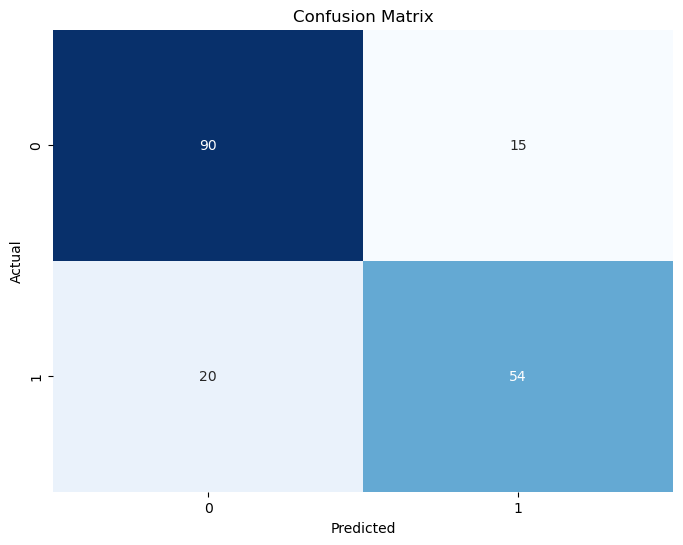

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance = importance.sort_values(ascending=False)

### Feature Importance

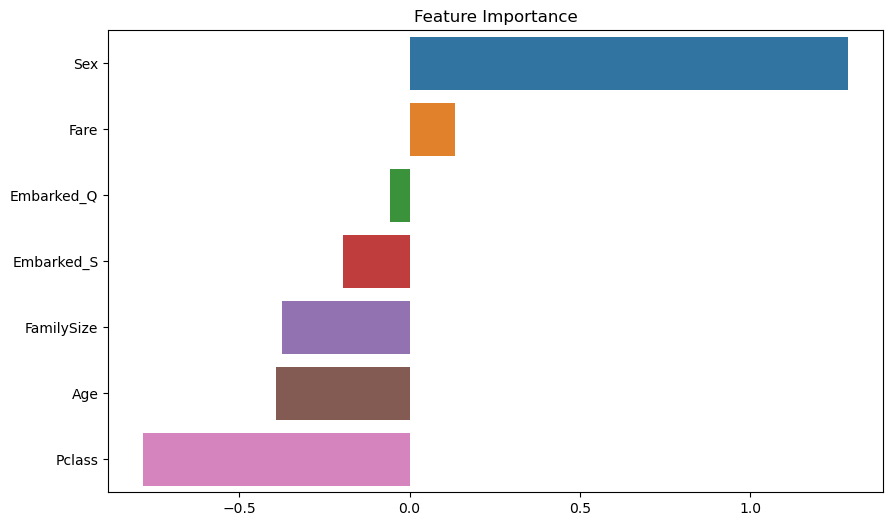

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index)
plt.title('Feature Importance')
plt.show()

### Conclusion

In [19]:
print("Factors influencing survival (from most to least):")
print(importance)

Factors influencing survival (from most to least):
Sex           1.286848
Fare          0.133876
Embarked_Q   -0.057071
Embarked_S   -0.194877
FamilySize   -0.375855
Age          -0.392735
Pclass       -0.781857
dtype: float64


In [ ]:
merci